In [49]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import TimeSeriesSplit,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

from datetime import datetime
import time

np.random.seed(0)

In [50]:
train = pd.read_csv('./input/train_ML_IOT.csv')
test = pd.read_csv('./input/test_ML_IOT.csv')

In [51]:
train["DateTime"] = pd.to_datetime(train["DateTime"])
test["DateTime"] = pd.to_datetime(test["DateTime"])

In [52]:
train.drop(["ID"],axis = 1,inplace=True)
test.drop(["ID"],axis = 1,inplace=True)
train.set_index("DateTime",drop=True,inplace=True)
test.set_index("DateTime",drop=True,inplace=True)

In [63]:
j1 = train[train["Junction"]==1] 
j1["y"] = j1.Vehicles.values
j1 = j1.drop(['Junction','Vehicles'],axis=1)

# j2 = train[train["Junction"]==2] 
# j2["y"] = j1.Vehicles.values
# j2 = j2.drop(['Junction','Vehicles'],axis=1)

# j3 = train[train["Junction"]==3] 
# j3["y"] = j1.Vehicles.values
# j3 = j3.drop(['Junction','Vehicles'],axis=1)

# j4 = train[train["Junction"]==4] 
# j4["y"] = j1.Vehicles.values
# j4 = j4.drop(['Junction','Vehicles'],axis=1)


j1.reset_index()



# js = [j1, j2, j3, j4]

/tmp/ipykernel_8621/1893534202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j1["y"] = j1.Vehicles.values


,DateTime,y
0,2015-11-01 00:00:00,15
1,2015-11-01 01:00:00,13
2,2015-11-01 02:00:00,10
3,2015-11-01 03:00:00,7
4,2015-11-01 04:00:00,9
...,...,...
14587,2017-06-30 19:00:00,105
14588,2017-06-30 20:00:00,96
14589,2017-06-30 21:00:00,90
14590,2017-06-30 22:00:00,84


In [64]:
j1

,y
DateTime,
2015-11-01 00:00:00,15
2015-11-01 01:00:00,13
2015-11-01 02:00:00,10
2015-11-01 03:00:00,7
2015-11-01 04:00:00,9
...,...
2017-06-30 19:00:00,105
2017-06-30 20:00:00,96
2017-06-30 21:00:00,90


In [35]:
j1["x1"] = j1.Vehicles.shift(1)
j1 = j1.drop(axis=0,index="2015-11-01 00:00:00	")

/tmp/ipykernel_8621/1229582078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j1["x1"] = j1.Vehicles.shift(1)


In [36]:
model = LinearRegression()

In [39]:
X = j1.drop(['Vehicles'],axis=1)
y = j1.drop(['Junction'],axis=1)

model.fit(X.reshape(-1,1),y)
j1['Vehicles2'] = model.predict(X.reshape(-1,1))

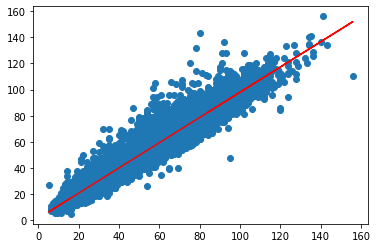

In [41]:
plt.scatter(x=X,y=y)
plt.plot(X,model.predict(X.reshape(-1,1)),color="red")

<AxesSubplot:xlabel='DateTime'>

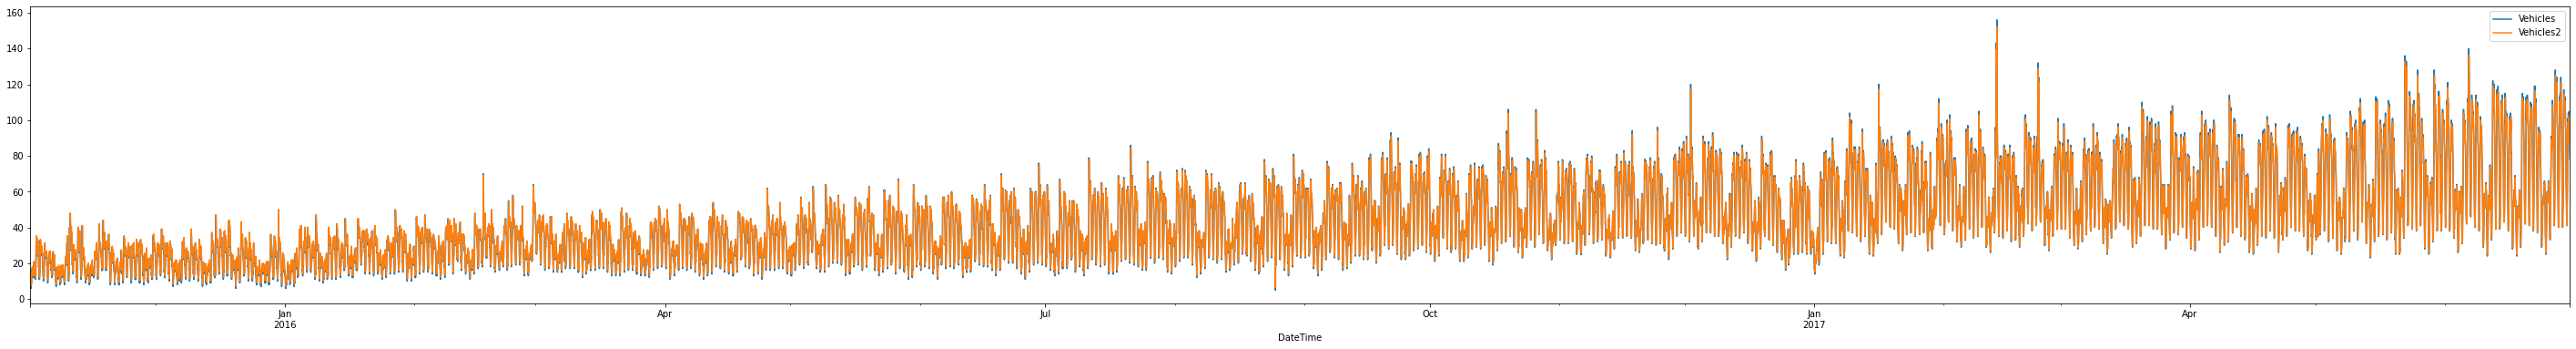

In [46]:
j1[["Vehicles","Pred"]].plot(figsize=(50,6))